## **ASSIGNMENT 2**

In [71]:
import pandas as pd
import numpy as np

#create DataFrame
df = pd.read_csv('/Churn_Modelling.csv')
#view first five rows of DataFrame
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **Univariate analysis**

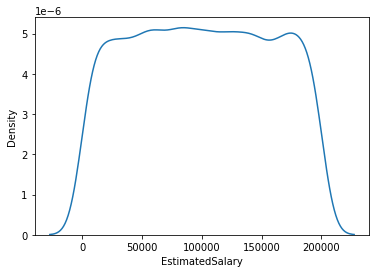

In [5]:


import seaborn as sns

sns.kdeplot(df['EstimatedSalary'])

## **Bi-Variate analysis**

Text(0, 0.5, 'EstimatedSalary')

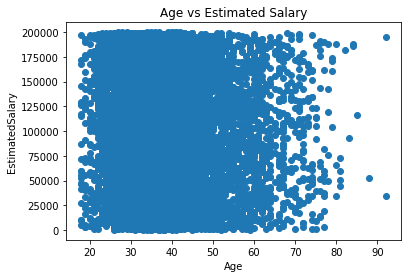

In [6]:
import matplotlib.pyplot as plt

#create scatterplot of hours vs. score
plt.scatter(df.Age, df.EstimatedSalary)
plt.title('Age vs Estimated Salary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

## **Multivariate Analysis**

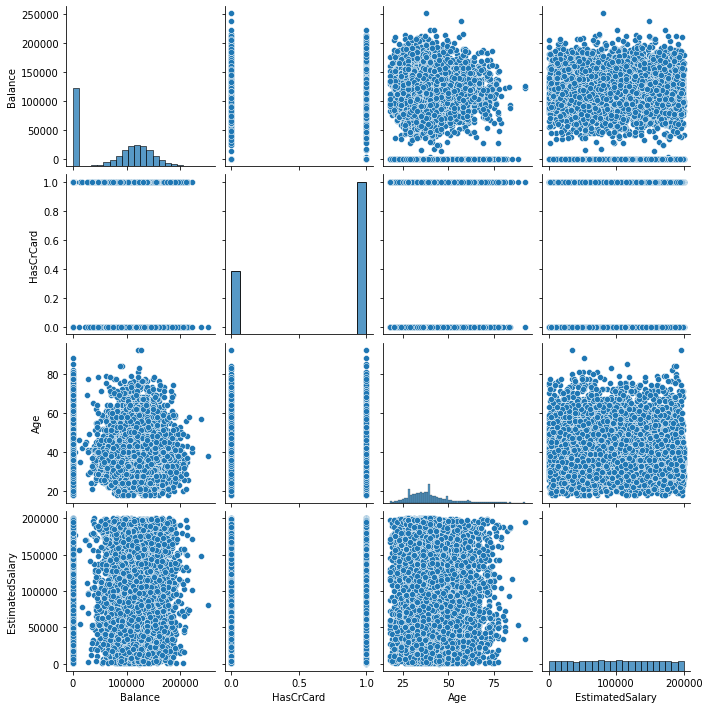

In [7]:
import seaborn as sns
sns.pairplot(data=df[['Balance','HasCrCard','Age','EstimatedSalary']])

## **Descriptive Statistics**

In [8]:
print (df. describe(include='all'))

          RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count 

## **Handling missing values**

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing(NULL) values present in the dataset. 

# **Handling Outliers**


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
7             8    15656148     Obinna          376   Germany  Female   29   
942         943    15804586        Lin          376    France  Female   46   
1193       1194    15779947     Thomas          363     Spain  Female   28   
1405       1406    15612494  Panicucci          359    France  Female   44   
1631       1632    15685372   Azubuike          350     Spain    Male   54   
1838       1839    15758813   Campbell          350   Germany    Male   39   
1962       1963    15692416  Aikenhead          358     Spain  Female   52   
2473       2474    15679249       Chou          351   Germany  Female   57   
2579       2580    15597896   Ozoemena          365   Germany    Male   30   
8154       8155    15791533     Ch'ien          367     Spain    Male   42   
8723       8724    15803202  Onyekachi          350    France    Male   51   
8762       8763    15765173        Lin          350    France  F

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


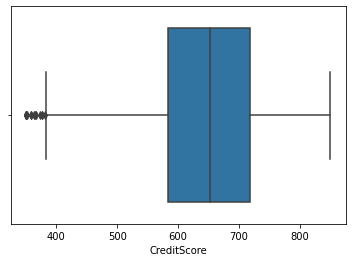

In [18]:
Q1 = df['CreditScore'] .quantile(0.25)
Q3 = df['CreditScore'] .quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = df[(df['CreditScore'] < Q1 - whisker_width*IQR) | (df['CreditScore'] > Q3 + whisker_width*IQR)]
print(Fare_outliers)
sns.boxplot(df['CreditScore'],data=df)

Outliers can be seen at the left extreme of the boxplot. We replace them with median value.


652.0
755.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,662.278800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,105.337412,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,778.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,778.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


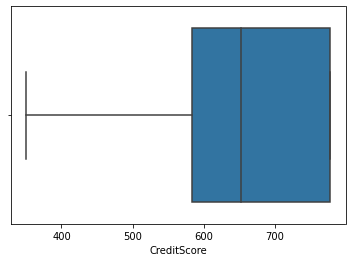

In [24]:
print(df['CreditScore'].quantile(0.50)) 
print(df['CreditScore'].quantile(0.95)) 
df['CreditScore'] = np.where(df['CreditScore'] >652, 778, df['CreditScore'])

sns.boxplot(df['CreditScore'],data=df)
df.describe()

Here it can be seen that the outliers have diasppeared!!

## **Encode Categorical data**

In [41]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()



,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [42]:
obj_df["Geography"] = obj_df["Geography"].astype('category')
obj_df["Gender"] = obj_df["Gender"].astype('category')
obj_df.dtypes

Surname        object
Geography    category
Gender       category
dtype: object

In [43]:
obj_df["Geography"] = obj_df["Geography"].cat.codes
obj_df["Gender"] = obj_df["Gender"].cat.codes

obj_df.head()

,Surname,Geography,Gender
0,Hargrave,0,0
1,Hill,2,0
2,Onio,0,0
3,Boni,0,0
4,Mitchell,2,0


## **Seperating Dependent and Independent variables**

In [72]:
df=df.drop(['Surname'],axis=1)
df=df.drop(['Gender'],axis=1)
df['Geography']=obj_df['Geography']
df['Gender']=obj_df['Gender']

X= df.iloc[:,:-2].values
y= df.iloc[:,-2].values
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,608,2,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,850,2,43,2,125510.82,1,1,1,79084.10,0,0


## **Scaling the Independent Variables**

In [78]:
from sklearn import preprocessing

# standardization of dependent variables
standard = preprocessing.scale(X)
print(standard)

[[-1.73187761 -0.78321342 -0.32622142 ...  0.64609167  0.97024255
   0.02188649]
 [-1.7315312  -0.60653412 -0.44003595 ... -1.54776799  0.97024255
   0.21653375]
 [-1.73118479 -0.99588476 -1.53679418 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 1.73118479 -1.47928179  0.60498839 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.7315312  -0.11935577  1.25683526 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.73187761 -0.87055909  1.46377078 ...  0.64609167 -1.03067011
  -1.07636976]]


## **Splitting the data into train and test data**

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)
print(X_train, X_test, y_train, y_test)

[[2.9680000e+03 1.5595324e+07 5.7900000e+02 ... 0.0000000e+00
  0.0000000e+00 5.8310000e+03]
 [7.0100000e+02 1.5803457e+07 7.5000000e+02 ... 1.0000000e+00
  0.0000000e+00 9.5611470e+04]
 [3.4820000e+03 1.5644686e+07 7.2900000e+02 ... 1.0000000e+00
  1.0000000e+00 4.2855970e+04]
 ...
 [3.2650000e+03 1.5574372e+07 7.3800000e+02 ... 1.0000000e+00
  0.0000000e+00 1.8142987e+05]
 [9.8460000e+03 1.5664035e+07 5.9000000e+02 ... 1.0000000e+00
  1.0000000e+00 1.4875016e+05]
 [2.7330000e+03 1.5592816e+07 6.2300000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1885526e+05]] [[9.3950000e+03 1.5615753e+07 5.9700000e+02 ... 1.0000000e+00
  1.0000000e+00 1.9285267e+05]
 [8.9900000e+02 1.5654700e+07 5.2300000e+02 ... 1.0000000e+00
  0.0000000e+00 1.2870210e+05]
 [2.3990000e+03 1.5633877e+07 7.0600000e+02 ... 1.0000000e+00
  1.0000000e+00 7.5732250e+04]
 ...
 [2.0420000e+03 1.5709846e+07 8.4000000e+02 ... 1.0000000e+00
  0.0000000e+00 8.4487620e+04]
 [1.1090000e+03 1.5678886e+07 6.7900000e+02 ... 1.0000000e+